In [104]:
import pandas
import numpy as np
from matplotlib import pyplot as plt

In [105]:
df = pandas.read_csv("metric.csv")

In [106]:
odgpf = df[df['algorithm'] == "ODG-PF"]
odgpfgnu =  df[df['algorithm'] == "ODG-PF-GNU"]
odgpfpp =  df[df['algorithm'] == "ODG-PF-PP"]

In [107]:
fgmstech = df[df['algorithm'] == "FGM-STECH"]
fgmgnu = df[df['algorithm'] == "FGM-GNU"]
fgmpp = df[df['algorithm'] == "FGM-PP"]

In [109]:
def plotting(data):
    bar_size = 3
    x_range = np.arange(len(data['map']))
    x_range_plot = np.linspace(-0.3, 0.3, bar_size)
    x_range_div = x_range_plot[-1] - x_range_plot[-2]
    plt.bar(x_range + x_range_plot[0], data['comfort'], width=x_range_div)
    plt.bar(x_range + x_range_plot[1], data['avg_speed'], width=x_range_div)
    plt.bar(x_range + x_range_plot[2], data['st'], width=x_range_div)
    # plt.bar(x_range + x_range_plot[3], data['lap_time_1'], width=x_range_div)
    plt.legend(['Comfort', 'Average Speed', 'ST'])
    plt.xticks(x_range, list(data['map']))
    plt.grid(axis='y')
    plt.xlabel("Maps")
    plt.ylabel("Scores")
    plt.title(list(data['algorithm'])[0])
    print()
    plt.rcParams['figure.figsize'] = [6, 6]
    plt.rcParams['figure.dpi'] = 150 # 200 e.g. is really fine, but slower
    plt.show()

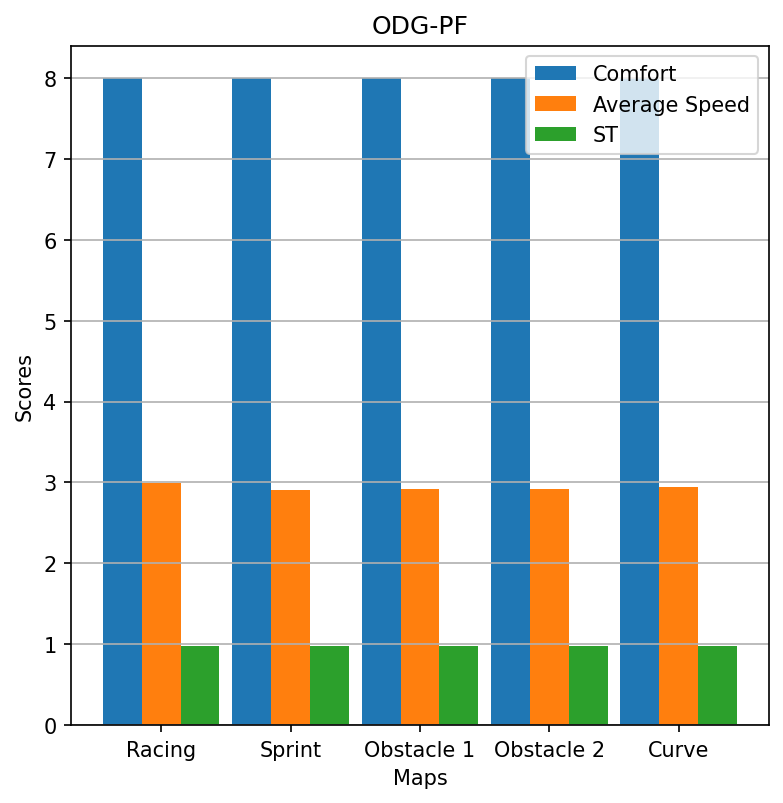

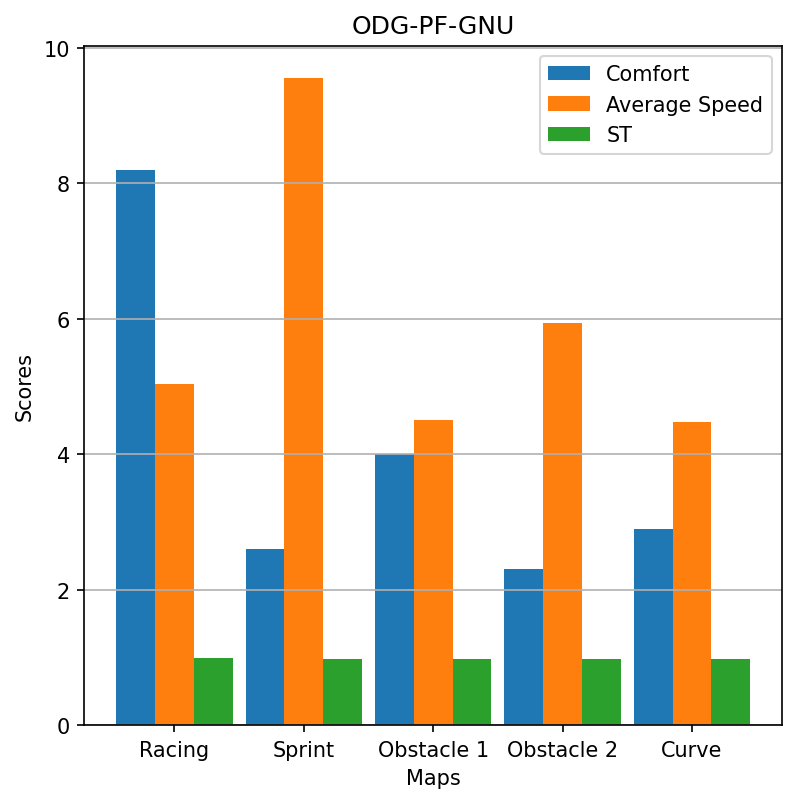

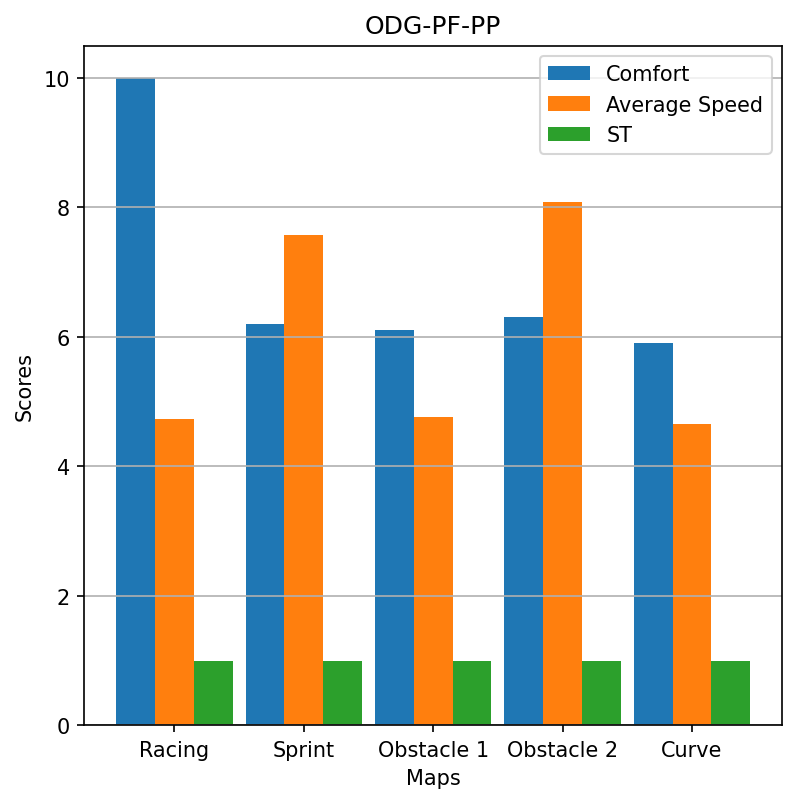

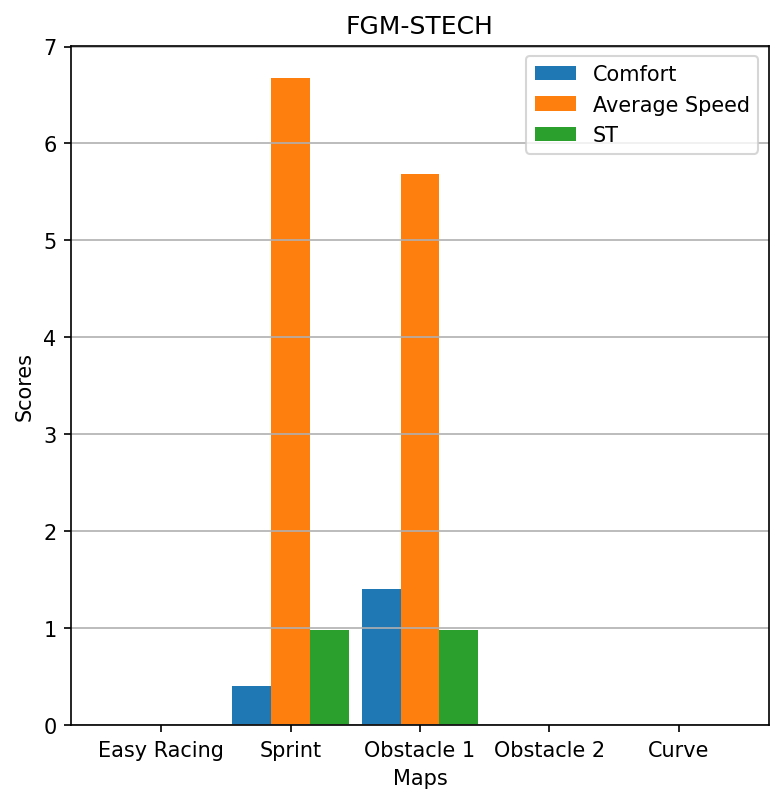

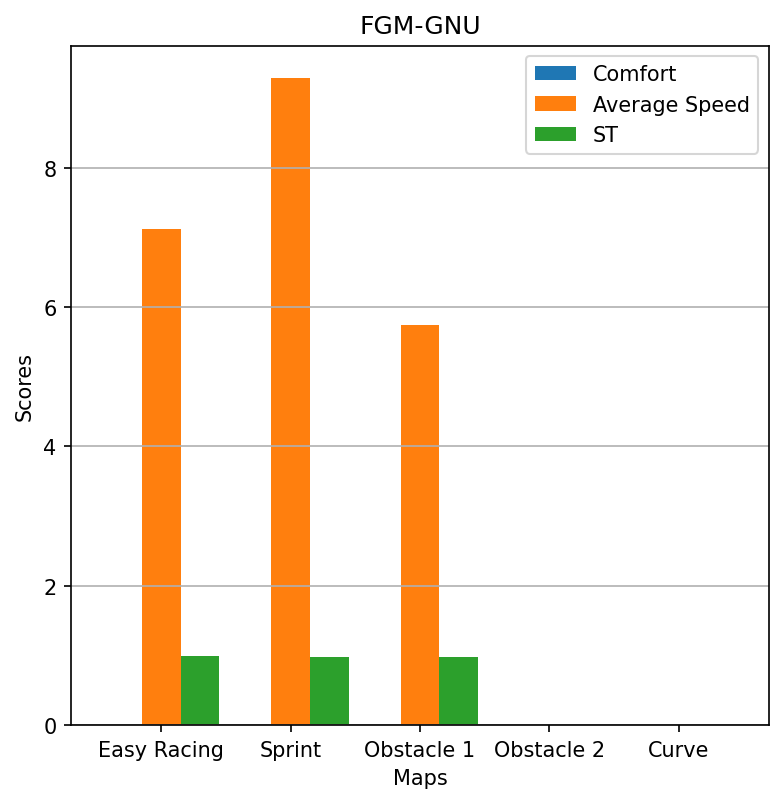

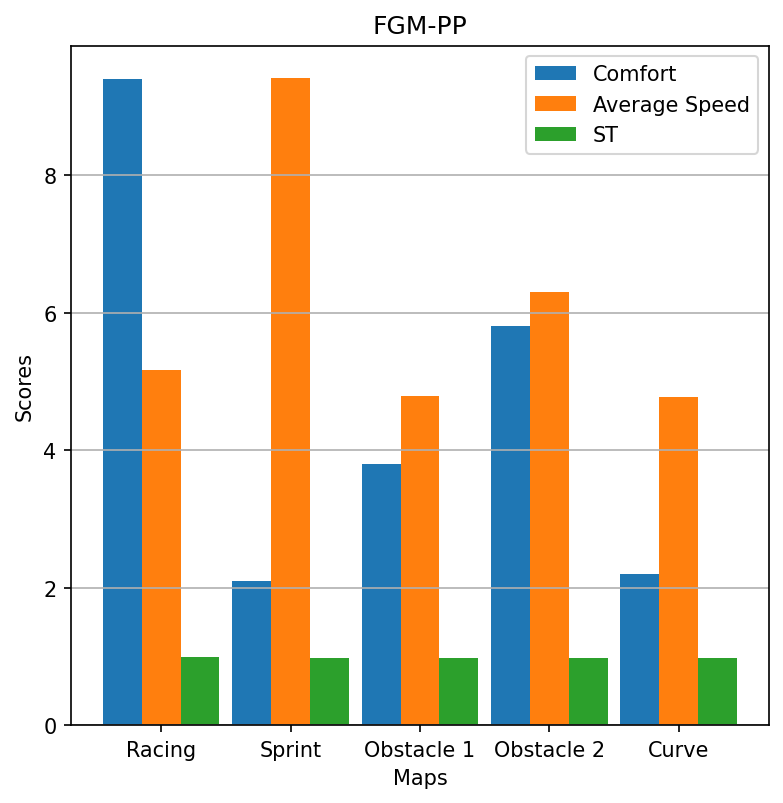

In [110]:
for i in [odgpf, odgpfgnu, odgpfpp, fgmstech, fgmgnu, fgmpp]:
    plotting(i)